In [1]:
#Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn import cluster as cl
from sklearn  import preprocessing  as pr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn import ensemble as ens



In [47]:
# Загрузка данных, удаление лишних данных по всем 3 выборкам
column=['0takt','1takt','2takt','3takt','4takt','5takt','6takt','7takt','8takt',
                          '9takt','10takt','11takt','12takt','13takt','14takt','15takt','16takt','17takt']
try:
    df1=pd.read_csv('SOP1.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)

    df2=pd.read_csv('SOP2.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    df3=pd.read_csv('SOP3.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    print('Данные загруженны ')
except:
    print('Данные не загрузились ')

try:  
    df1=df1.drop([0,0]) # удаление технической строки
    df1=df1.drop(columns=[17,0]) # удаление лишних столбцов,   расстояние мм будет индекс
    df2=df2.drop([0,0]) # удаление технической строки
    df2=df2.drop(columns=[17,0])  # удаление лишних столбцов,   расстояние мм будет индекс 
    df3=df3.drop([0,0]) # удаление технической строки
    df3=df3.drop(columns=[17,0])# удаление лишних столбцов,   расстояние мм будет индекс
    df1=df1.astype("float32")# приводим данные к float
    df2=df2.astype("float32")# приводим данные к float
    df3=df3.astype("float32")# приводим данные к float
    print('Данные  обработаны ')
except:
    print('Данные не обработались ')

    
#Здесь указываем требуемый датафрейм
df11=df1.copy()

#Приведение к общей координате
for n in range(1,17):
    df11[n]=np.roll(df11[n],-50)
    
for p in [3,4,5,6,9,10]:
    df11[n]=np.roll(df11[n],95)
    
for n in range(1,17):
    df11[n]=np.roll(df11[n],-95)
    
    
    
#Загрузка файла с целевой переменной
#Здесь указываем требуемый таргет
targ=pd.read_table('target1.csv',sep=',')
targ
targ.fillna(0)

#Сделаем в датафрейме общем разбитие на классы в соответствии с имеющимся таргетом
df11['deffect']=0
for n in range(len(targ)):
    if targ['Сторона'][n]=='A':
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=1
    if targ['Сторона'][n]=='B':
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=1  
    if targ['Тип дефекта'][n]=='T':
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n])]=1    

Данные загруженны 
Данные  обработаны 


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\tai-sku\AppData\Local\Temp/ipykernel_12924/1717038395.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=1
C:\Users\tai-sku\AppData\Local\Temp/ipykernel_12924/1717038395.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.deffect[targ

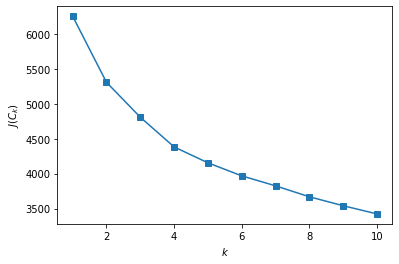

In [48]:
from sklearn.cluster import KMeans

SC=pr.StandardScaler()
df11X=df11[[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
y=df11.deffect
X=df11X#SC.fit_transform(df11X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [49]:


#Зделаем препроцессинг данных (подготовку)
SC=pr.StandardScaler()
df11X=df11[[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
y=df11.deffect
X=SC.fit_transform(df11X)

# Используем несколько алгоритмов кластеризации
KM=cl.KMeans(n_clusters=6,  init='k-means++', n_init=10, max_iter=300, 
          tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
DB=cl.DBSCAN(eps=50,  min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', 
       leaf_size=30, p=None, n_jobs=None)
AP=cl.AffinityPropagation( damping=0.5, max_iter=200, convergence_iter=15, copy=True,
                    preference=None, affinity='euclidean', verbose=False, random_state=None)

AC=cl.AgglomerativeClustering(n_clusters=6,  affinity='euclidean', memory=None, connectivity=None, 
                        compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

OP=cl.OPTICS( min_samples=5, max_eps=50, metric='minkowski', p=2, metric_params=None, cluster_method='xi', 
       eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', 
       leaf_size=30, memory=None, n_jobs=None)

SpC=cl.SpectralClustering(n_clusters=5, random_state=1,
                                     affinity='nearest_neighbors')

df111=df11.copy()
df111['KmeansSC']=KM.fit_predict(X)
#df111['DBSCANSC']=DB.fit_predict(X)
#df111['APSC']=DB.fit_predict(X)
df111['ACSC']=AC.fit_predict(X)
df111['OPSC']=OP.fit_predict(X)
df111['SpCSC']=SpC.fit_predict(X)

df111['Kmeans']=KM.fit_predict(df11)
df111['DBSCAN']=DB.fit_predict(df11)
df111['AP']=AP.fit_predict(df11)
df111['AC']=AC.fit_predict(df11)
df111['OP']=OP.fit_predict(df11)
df111['SpC']=SpC.fit_predict(df11)


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strin

In [50]:
# Оценка кластеризации по таргету с помощью метрик, подбор параметров
SC=pr.StandardScaler()
df11X=df11[[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]


y=df11.deffect
y=y.fillna(0)
X=SC.fit_transform(df11X)

algorithms = []
algorithms.append(cl.KMeans(n_clusters=5, random_state=1))
algorithms.append(cl.AffinityPropagation())
algorithms.append(cl.SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(cl.AgglomerativeClustering(n_clusters=3))




data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.200542,0.141858,0.188167,0.116679,0.144041,0.326087
Affinity,0.016623,0.135397,0.579418,0.086206,0.150082,0.205844
Spectral,0.077839,0.076823,0.053648,0.150753,0.079135,0.346735
Agglomerative,0.205302,0.146696,0.167431,0.132496,0.147929,0.293934


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

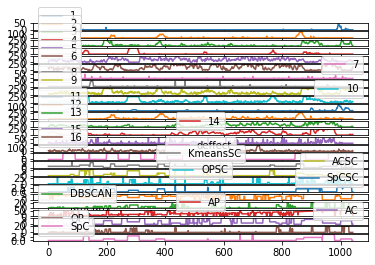

In [51]:
df111.plot.line(subplots=True)

# Добавим классификатор на имеющийся DF

In [52]:
X=df111[[         1,          2,          3,          4,          5,          6,
                7,          8,          9,         10,         11,         12,
               13,         14,         15,         16,   'KmeansSC',
           'ACSC',     'OPSC',    'SpCSC',   'Kmeans',   'DBSCAN',       'AP',
             'AC',       'OP',      'SpC']]
y=df111.deffect

MiMa=pr.Normalizer()#pr.MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

X=MiMa.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50) 

X_train.shape, y_train.shape
X_test.shape, y_test.shape

C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


((313, 26), (313,))

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.92
Precision: 0.88
Recall: 0.92
F1: 0.90

Матрица ошибок:
[[218  20]
 [  5  70]]


In [54]:
y_pred = clf.predict(X)

In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
cc=pd.DataFrame(y_pred )

In [57]:
cc.value_counts()

0    772
1    270
dtype: int64

In [58]:
cc.to_csv('rezult.csv')

In [59]:
metrics.adjusted_rand_score(df11.deffect, y_pred)

0.8827324421725337

array([<AxesSubplot:>], dtype=object)

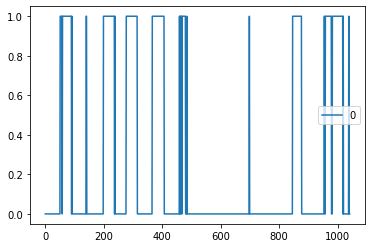

In [60]:
cc.plot.line(subplots=True)

<AxesSubplot:>

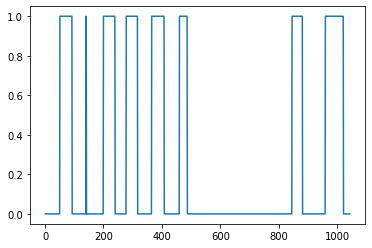

In [61]:
df11.deffect.plot.line()